In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')

In [6]:
#Here's what the df looks like
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
#Data Cleaning and Data Transformation

# Drop Null values
df.dropna(subset=['CustomerID'], inplace=True)

# Keep positive quantity values
df = df.loc[df['Quantity'] > 0]

# Remove rows with negative price
df = df.loc[df['UnitPrice'] > 0]

# Ignore the records for the incomplete month
df = df.loc[df['InvoiceDate'] < '2011-12-01']

# Calculate total sales
df['Sales'] = df['Quantity'] * df['UnitPrice']

# Create a dataframe with orders
df_orders = df.groupby(['CustomerID',
                        'InvoiceNo']).agg({'Sales': sum,
                                           'InvoiceDate': max})

In [22]:
df_orders.head(10)

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
           562032       584.91 2011-08-02 08:48:00
           573511      1294.32 2011-10-31 12:25:00
12348.0    539318       892.80 2010-12-16 19:09:00
           541998       227.44 2011-01-25 10:42:00
           548955       367.00 2011-04-05 10:47:00

In [26]:

def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days / x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

df_summary = df_orders.reset_index().groupby('CustomerID').agg({
            'Sales': [min, max, sum, groupby_mean, groupby_count],
            'InvoiceDate': [min, max, purchase_duration, avg_frequency]
             })
df_summary.columns = ['_'.join(col).lower() for col in df_summary.columns]
df_summary = df_summary.loc[df_summary['invoicedate_purchase_duration'] > 0]

In [29]:
df_summary.head(2)

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12347.0,382.52,1294.32,4085.18,680.863333,6,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.5
12348.0,227.44,892.80,1797.24,449.310000,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.5


In [28]:
def summarize_customer_data(df_orders):
    df_summary = df_orders.reset_index().groupby('CustomerID').agg({
        'Sales': [min, max, sum, lambda x: x.mean(), lambda x: x.count()],
        'InvoiceDate': [min, max, lambda x: (x.max() - x.min()).days, lambda x: (x.max() - x.min()).days / x.count()]
    })
    df_summary.columns = ['_'.join(col).lower() for col in df_summary.columns]
    df_summary = df_summary.loc[df_summary['invoicedate_purchase_duration'] > 0]

    return df_summary

# Example usage:
# Assuming you have a DataFrame named "df_orders" containing the data
summary_data = summarize_customer_data(df_orders)

KeyError: 'invoicedate_purchase_duration'

In [12]:
df_summary

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12347.0,382.52,1294.32,4085.18,680.863333,6,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.500000
12348.0,227.44,892.80,1797.24,449.310000,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12352.0,120.33,840.30,2506.04,313.255000,8,2011-02-16 12:33:00,2011-11-03 14:37:00,260,32.500000
12356.0,58.35,2271.62,2811.43,937.143333,3,2011-01-18 09:50:00,2011-11-17 08:40:00,302,100.666667
12359.0,547.50,2876.85,6372.58,1593.145000,4,2011-01-12 12:43:00,2011-10-13 12:47:00,274,68.500000
...,...,...,...,...,...,...,...,...,...
18270.0,111.95,171.20,283.15,141.575000,2,2011-03-18 12:41:00,2011-11-01 13:57:00,228,114.000000
18272.0,340.72,753.66,2710.70,542.140000,5,2011-04-07 09:35:00,2011-10-25 11:52:00,201,40.200000
18273.0,51.00,102.00,153.00,76.500000,2,2011-03-27 11:22:00,2011-09-05 11:27:00,162,81.000000


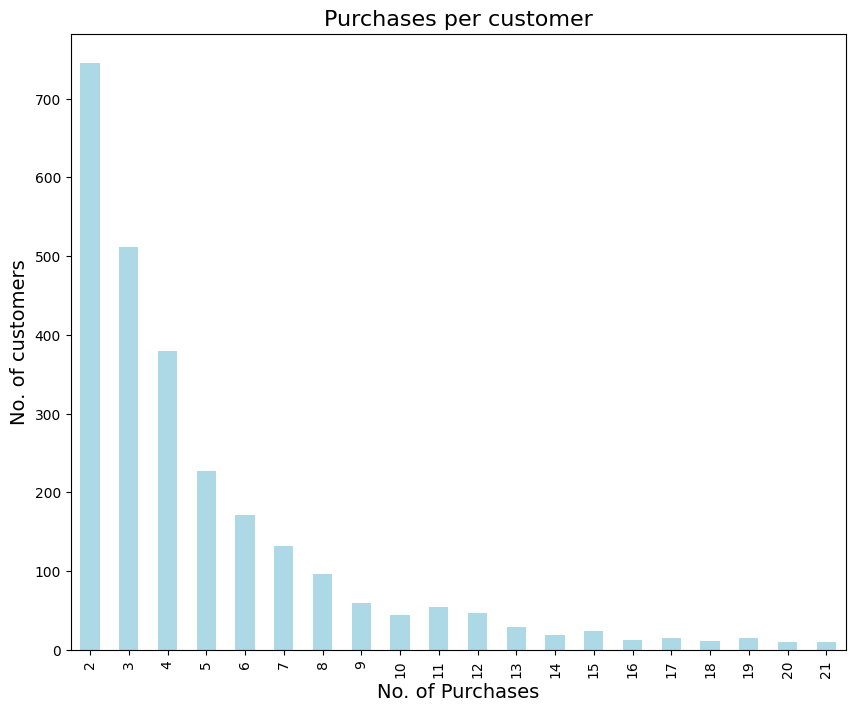

In [31]:
# Let's look at the number of purchases
ax = df_summary.groupby('sales_count').count()['sales_avg'][:20].plot(
        kind='bar', 
        color='lightblue', 
        figsize=(10,8), 
        grid=False)
plt.xlabel('No. of Purchases', fontsize=14)
plt.ylabel('No. of customers', fontsize=14)
plt.title('Purchases per customer', fontsize=16);

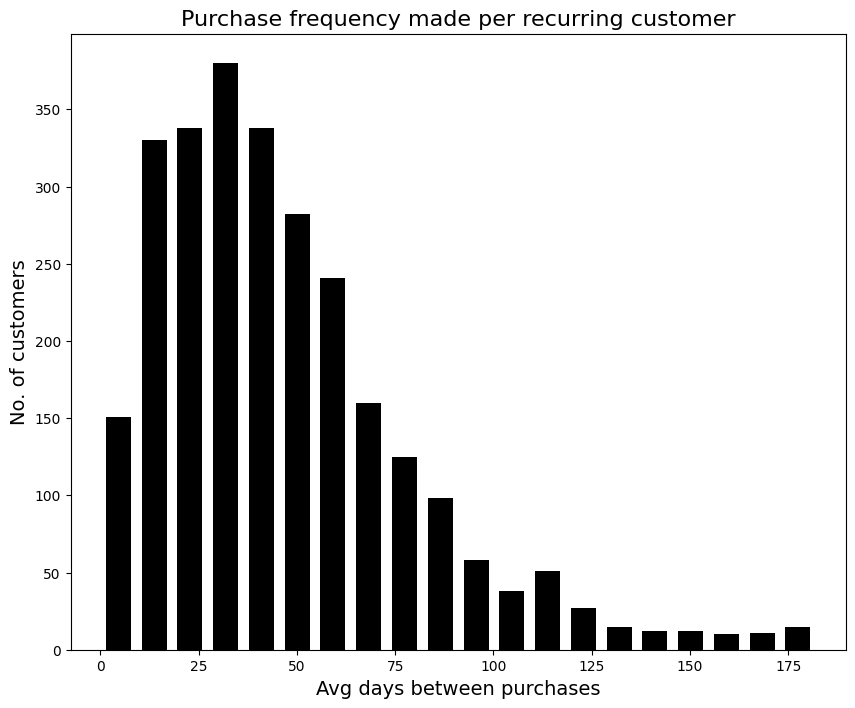

In [33]:
ax = df_summary['invoicedate_purchase_frequency'].hist(
        bins=20,
        color='black',
        rwidth=0.7,
        figsize=(10,8),
        grid=False)
plt.xlabel('Avg days between purchases', fontsize=14)
plt.ylabel('No. of customers', fontsize=14)
plt.title('Purchase frequency made per recurring customer', fontsize=16);

In [34]:
# Let's slice the data into chunks with 3-month data each 
# and take the last chunk as the target for predictions
clv_freq = '3M'
df_data = df_orders.reset_index().groupby([
            'CustomerID',
            pd.Grouper(key='InvoiceDate', freq=clv_freq)
            ]).agg({'Sales': [sum, groupby_mean, groupby_count],})
df_data.columns = ['_'.join(col).lower() for col in df_data.columns]
df_data = df_data.reset_index()
map_date_month = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
                    sorted(df_data.reset_index()['InvoiceDate'].unique(), reverse=True))}
df_data['M'] = df_data['InvoiceDate'].apply(lambda x: map_date_month[str(x)[:10]])
df_features = pd.pivot_table(
                df_data.loc[df_data['M'] != 'M_1'], 
                values=['sales_sum', 'sales_avg', 'sales_count'], 
                columns='M', 
                index='CustomerID')
df_features.reset_index()
df_features.columns = ['_'.join(col) for col in df_features.columns]
df_features.reset_index(level=0, inplace=True)

# Let us fill in the Null values with 0
df_features.fillna(0, inplace=True)

# Select the target
df_target = df_data.loc[df_data['M'] == 'M_1', ['CustomerID', 'sales_sum']]
df_target.columns = ['CustomerID', 'CLV_'+clv_freq]

df_sample_set = df_features.merge(
                df_target, 
                left_on='CustomerID', 
                right_on='CustomerID',
                how='left')
df_sample_set.fillna(0, inplace=True)

In [35]:
df_sample_set

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CLV_3M
0,12346.0,0.000000,0.000,77183.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,0.00
1,12347.0,584.910000,509.385,475.390000,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,1294.32
2,12348.0,310.000000,367.000,227.440000,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,0.00
3,12350.0,0.000000,0.000,334.400000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,0.00
4,12352.0,316.250000,0.000,312.362000,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,311.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611,18280.0,0.000000,0.000,180.600000,0.00,0.0,0.0,1.0,0.0,0.00,0.00,180.60,0.00,0.00
3612,18281.0,0.000000,80.820,0.000000,0.00,0.0,1.0,0.0,0.0,0.00,80.82,0.00,0.00,0.00
3613,18282.0,100.210000,0.000,0.000000,0.00,1.0,0.0,0.0,0.0,100.21,0.00,0.00,0.00,0.00
3614,18283.0,92.696667,131.170,105.966667,0.00,3.0,4.0,3.0,0.0,278.09,524.68,317.90,0.00,766.21


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

target_var = 'CLV_3M'
all_features = [x for x in df_sample_set.columns if x not in ['CustomerID', target_var]]

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
                                    df_sample_set[all_features], 
                                    df_sample_set[target_var], 
                                    random_state=2,
                                    test_size=0.35)
lin_reg = LinearRegression(n_jobs=1)
lin_reg.fit(X_train, y_train)
coef = pd.DataFrame(list(zip(all_features, lin_reg.coef_)))
coef.columns = ['feature', 'coef']

In [37]:
from sklearn.metrics import r2_score, median_absolute_error

# Let's evaluate the model
train_preds =  lin_reg.predict(X_train)
test_preds = lin_reg.predict(X_test)

<Figure size 640x480 with 0 Axes>

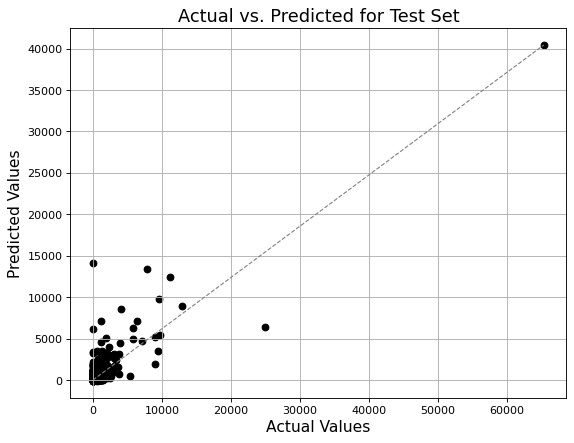

In [39]:
# scatter plot
plt.figure(figsize=(8, 6), dpi=80)
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(y_test, test_preds, color='black')
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray',
          lw=1, linestyle='--')

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted for Test Set', fontsize=16)
plt.grid()


(array([[   0.,    0.,    0.,    0.,    0.,    0.,  130.,  567.,  634.,
          597.],
        [1928.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.]]),
 array([6.200000e+00, 1.833880e+03, 3.661560e+03, 5.489240e+03,
        7.316920e+03, 9.144600e+03, 1.097228e+04, 1.279996e+04,
        1.462764e+04, 1.645532e+04, 1.828300e+04]),
 <a list of 2 BarContainer objects>)

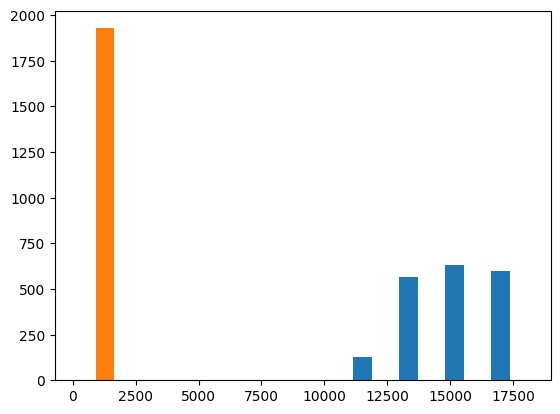

In [48]:
plt.hist(df_target[df_target['CLV_3M'] <= 1000])

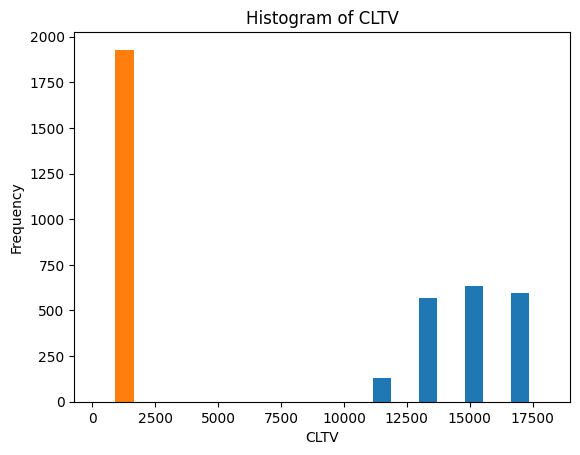

In [45]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(df_target[df_target['CLV_3M'] <= 1000])

# Set plot title and labels
plt.title('Histogram of CLTV')
plt.xlabel('CLTV')
plt.ylabel('Frequency')

# Show the plot
plt.show()